In [36]:
import pandas as pd

review_df = pd.read_csv("/Users/apple/Desktop/Business Project/data/review.csv")
product_df = pd.read_csv("/Users/apple/Desktop/Business Project/data/product dataset.csv")


In [37]:
# Output the shape of the DataFrame before filtering
print("Shape before filtering:", review_df.shape)
print("Shape before filtering 2:", product_df.shape)
print("Unique values in 'main_category' with their counts:")
print(product_df['main_category'].value_counts())

Shape before filtering: (2128605, 10)
Shape before filtering 2: (94327, 16)
Unique values in 'main_category' with their counts:
Tools & Home Improvement        42694
Appliances                      25572
Amazon Home                     13915
Industrial & Scientific          5521
Automotive                        568
Health & Personal Care            268
All Electronics                   168
Sports & Outdoors                 124
Grocery                            95
Cell Phones & Accessories          85
Musical Instruments                83
Baby                               82
AMAZON FASHION                     71
Office Products                    68
All Beauty                         68
Computers                          57
Pet Supplies                       49
Camera & Photo                     39
Toys & Games                       38
Arts, Crafts & Sewing              33
Home Audio & Theater               31
Portable Audio & Accessories        5
Books                               

In [38]:
# Filter DataFrame for 'Appliances' in 'main_category'

filtered_df = product_df[product_df['main_category'] == 'Appliances']
selected_product_columns = ['main_category', 'title', 'average_rating', 'rating_number', 'store', 'parent_asin']
filtered_product_df = filtered_df[selected_product_columns]

selected_review_columns = ['rating', 'title', 'text', 'parent_asin', 'timestamp', 'verified_purchase']
filtered_review_df = review_df[selected_review_columns]

print("Shape before filtering:", filtered_product_df.shape)
print("Shape before filtering:", filtered_review_df.shape)


# Merge the DataFrames on 'parent_asin'
merged_df = filtered_review_df.merge(filtered_product_df, on='parent_asin', how='inner')

print(merged_df)

Shape before filtering: (25572, 6)
Shape before filtering: (2128605, 6)
        rating                                            title_x  \
0          5.0                                         Five Stars   
1          5.0  My old door hinge broke. This worked perfectly...   
2          5.0       Perfect fit and repair for our LG dryer door   
3          5.0                         Perfect match for DLE0442W   
4          5.0                                          Fit fine.   
...        ...                                                ...   
588773     1.0  One of the most disappointing purchases of my ...   
588774     1.0                                 Item was defective   
588775     1.0                                     They don't Fit   
588776     5.0                          Fits properly, thank you!   
588777     5.0                                         Five Stars   

                                                     text parent_asin  \
0         Part came quickl

In [39]:
verified_review = merged_df[merged_df['verified_purchase'] == True]
# Output the shape of the DataFrame after filtering
print("Shape after filtering:", verified_review.shape)

Shape after filtering: (553352, 11)


In [40]:
# Import necessary libraries

!pip install pandas scikit-learn nltk
!pip install scikit-learn sentence_transformers pandas numpy


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [41]:

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download


def preprocess_sentence(sentence):
    # Ensure the input is a string
    sentence = str(sentence)

    # Convert the sentence to lowercase
    sentence = sentence.lower()

    # Remove punctuation
    sentence = re.sub(r'[^\w\s]', '', sentence)

    # Remove non-alphanumeric characters
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    # Define stop words
    stop_words = set(stopwords.words('english'))

    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Add additional stop words
    additional_words = {'good', 'great', 'nice', 'el', 'ge','la', 'mi','de', 'se','excelente', 'br', 'thank', 'one', 'happy', 'best', 'lo', 'en', 'well'}
    stop_words.update(additional_words)

    # Remove stop words and perform lemmatization
    sentence = ' '.join([lemmatizer.lemmatize(word) for word in sentence.split() if word not in stop_words])

    # Remove extra whitespace
    sentence = re.sub(r'\s+', ' ', sentence).strip()

    return sentence



verified_review['processed_text'] = verified_review['text'].apply(preprocess_sentence)

print(verified_review)




[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


        rating                                            title_x  \
0          5.0                                         Five Stars   
1          5.0  My old door hinge broke. This worked perfectly...   
2          5.0       Perfect fit and repair for our LG dryer door   
3          5.0                         Perfect match for DLE0442W   
4          5.0                                          Fit fine.   
...        ...                                                ...   
588771     3.0                                   Misleading photo   
588772     1.0                                       Doesn't work   
588774     1.0                                 Item was defective   
588776     5.0                          Fits properly, thank you!   
588777     5.0                                         Five Stars   

                                                     text parent_asin  \
0         Part came quickly and fit my LG dryer.  Thanks!  B00AF7WZTM   
1       My old door hinge

In [42]:
# Method 1 TF-IDF + LDA  + BERT
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Vectorize using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=1)
tfidf = tfidf_vectorizer.fit_transform(verified_review['processed_text'])

# Fit the LDA model
n_components = 10  # Assume extracting 7 topics
lda = LatentDirichletAllocation(n_components=n_components, max_iter=20, random_state=42)
lda.fit(tfidf)

# Extract keywords for each topic
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

no_top_words = 10
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
topics = display_topics(lda, tfidf_feature_names, no_top_words)

# Convert extracted keywords to DataFrame
topics_df = pd.DataFrame(topics)

# Print extracted keywords
print(topics_df)

# Or display the extracted keywords DataFrame
topics_df


         0           1           2        3             4        5         6  \
0      ice      worked     product     love        filter  product    needed   
1    maker   described       price     look         water   return   exactly   
2     make    expected        fast    stove         taste    would       muy   
3  machine     exactly       value     hood         price     work     money   
4  working        item   excellent     easy  refrigerator      fit  supposed   
5     love   satisfied  advertised     work          work     back     saved   
6      use  everything     quality    range           job     item       que   
7    month        work    delivery  kitchen         brand     unit      bien   
8     cube    purchase    shipping    clean           fit    didnt      para   
9    water     looking       quick    light          much      box  producto   

         7        8            9  
0   washer     part         work  
1  clothes    dryer          fit  
2  machine    

,0,1,2,3,4,5,6,7,8,9
0,ice,worked,product,love,filter,product,needed,washer,part,work
1,maker,described,price,look,water,return,exactly,clothes,dryer,fit
2,make,expected,fast,stove,taste,would,muy,machine,old,perfect
3,machine,exactly,value,hood,price,work,money,wash,new,easy
4,working,item,excellent,easy,refrigerator,fit,supposed,dryer,install,install
5,love,satisfied,advertised,work,work,back,saved,dry,year,perfectly
6,use,everything,quality,range,job,item,que,use,replace,replacement
7,month,work,delivery,kitchen,brand,unit,bien,washing,easy,like
8,cube,purchase,shipping,clean,fit,didnt,para,small,month,part
9,water,looking,quick,light,much,box,producto,water,broke,worked


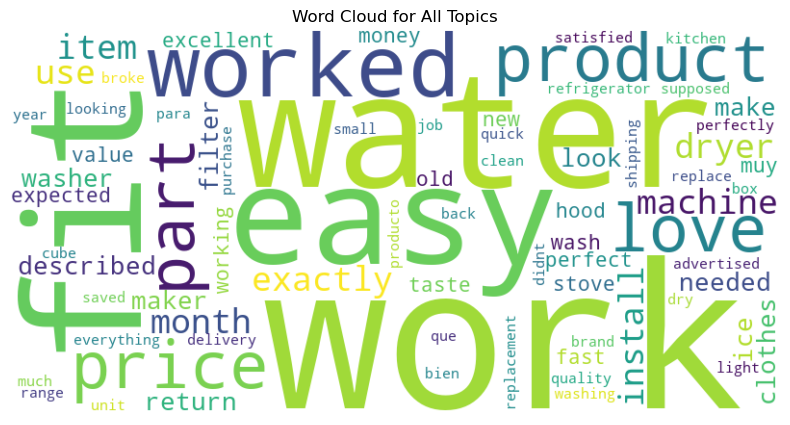

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

# Convert DataFrame with all topics to a single string
all_words = ' '.join(topics_df.values.flatten())

# Generate a word cloud for all combined topics
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for All Topics")
plt.axis("off")
plt.show()


In [50]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Initialize the model
model = SentenceTransformer("all-MiniLM-L6-v2")


characteristics = {
    "durability": ["durability", "broke", "month", "year", "week"],
    "price": ["saved", "money", "value", "price"],
    "install": ["install", "replacement"],
    "service": ["service", "customer"],
    "delivery": ["delivery", "fast", "received"],
    "look": ["design", "look"],
    "fit": ["small", "space", "fit"],
    "advertised": ["described", "advertised"],
    "work": ["use", "work", "working"],
    "emotion": ["love", "perfect", "expected", "excellent"],
    "brand": ["brand"]
}
# Create a list of all characteristic phrases
all_phrases = [phrase for phrases in characteristics.values() for phrase in phrases]

# Compute embeddings for document sentences and characteristic phrases
document_sentences = verified_review['processed_text'].tolist()
document_embeddings = model.encode(document_sentences)
phrase_embeddings = model.encode(all_phrases)

# Compute cosine similarities
similarities = util.pytorch_cos_sim(document_embeddings, phrase_embeddings).numpy()

# Output the pairs with their score
for idx_i, sentence in enumerate(document_sentences):
    print(f"Document Sentence: '{sentence}'")
    for characteristic, phrases in characteristics.items():
        # Get the indices of the phrases corresponding to the current characteristic
        phrase_indices = [all_phrases.index(phrase) for phrase in phrases]
        # Get the maximum similarity score for the current characteristic
        max_similarity = max(similarities[idx_i][phrase_indices])
        print(f" - Characteristic '{characteristic}': {max_similarity:.4f}")
    print()


In [ ]:
!pip install tf-keras
!pip install --upgrade transformers
!pip install sentence-transformers scikit-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
from transformers import pipeline
from transformers import BertTokenizer

# Initialize sentiment analysis pipeline with a specific model
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
tokenizer = BertTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# Define similarity threshold
similarity_threshold = 0.2 

# Collect results in a list
results = []

# Output the pairs with their score and sentiment
for idx, sentence in enumerate(document_sentences):
    print(f"Document Sentence: {sentence}")
    max_similarity = 0
    best_characteristic = None

    for characteristic, phrases in characteristics.items():
        phrase_indices = [all_phrases.index(phrase) for phrase in phrases]
        current_max_similarity = max(similarities[idx, phrase_indices])

        if current_max_similarity > max_similarity:
            max_similarity = current_max_similarity
            best_characteristic = characteristic

    if max_similarity > similarity_threshold:
        # Tokenize the sentence to check its length
        tokens = tokenizer.encode(sentence, truncation=True)
        

        # Get the sentiment
        sentiment = sentiment_pipeline(sentence)
        sentiment_label = sentiment[0]['label']
        sentiment_score = sentiment[0]['score']

        # Determine the polarity of the sentiment
        if sentiment_label in ['1 star', '2 stars']:
            sentiment_polarity = 'negative'
        elif sentiment_label in ['4 stars', '5 stars']:
            sentiment_polarity = 'positive'
        else:
            sentiment_polarity = 'neutral'
        # Append the results to the list
        results.append({
            'Sentence': sentence,
            'Characteristic': best_characteristic,
            'Characteristic Score': max_similarity,
            'Sentiment Polarity': sentiment_polarity,
            'Stars': sentiment_label,
            'Sentiment Score': sentiment_score
        })

        # Convert the results list to a DataFrame
        final_data = pd.DataFrame(results)

        print(f" - Characteristic '{best_characteristic}': {max_similarity:.4f}, sentiment polarity: {sentiment_polarity} ({sentiment_label} {sentiment_score:.4f})")


Document Sentence: part came quickly fit lg dryer thanks
 - Characteristic 'fit': 0.2397, sentiment polarity: positive (5 stars 0.4566)
Document Sentence: old door hinge broke worked perfectly replacement replacement procedure little involved anticipated made
 - Characteristic 'durability': 0.3726, sentiment polarity: positive (4 stars 0.3014)
Document Sentence: second time replaced hinge need learn lean door habr watched video know replace easily
 - Characteristic 'install': 0.3659, sentiment polarity: positive (5 stars 0.2422)
Document Sentence: ordered wednesday received friday shipped pennsylvania texas took minute install phillips screwdriver including cleaning year lint old gasketbr sure save reuse plastic bushing old hinge pin
 - Characteristic 'delivery': 0.3218, sentiment polarity: negative (1 star 0.4529)
Document Sentence: wish little le expensive made steel
 - Characteristic 'price': 0.2957, sentiment polarity: neutral (3 stars 0.2434)
Document Sentence: quick ship trick
 -

In [ ]:
# Convert the results list to a DataFrame
final_data = pd.DataFrame(results)

In [ ]:
# Create a DataFrame

final_data['Sentiment Polarity'] = final_data['Sentiment Polarity'].str.strip()
final_data['Stars'] = final_data['Stars'].str.strip()
final_data['Sentiment Score'] = final_data['Sentiment Score'].astype(float)
final_data['Characteristic Score'] = final_data['Characteristic Score'].astype(float)
final_data['Characteristic'] = final_data['Characteristic'].str.strip()

# check
print(final_data.head())

In [ ]:
# Plot 1: Distribution of Characteristics
plt.figure(figsize=(10, 6))
final_data['Characteristic'].value_counts().plot(kind='bar')
plt.title('Distribution of Characteristics')
plt.xlabel('Characteristic')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# sentiment plot
plt.figure(figsize=(10, 6))
final_data['Sentiment Polarity'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# each Characteristic
haracteristics = final_data['Characteristic'].unique()

for characteristic in characteristics:
    subset = final_data[final_data['Characteristic'] == characteristic]
    sentiment_distribution = subset['Sentiment Polarity'].value_counts(normalize=True)

    plt.figure(figsize=(8, 6))
    sentiment_distribution.plot(kind='bar', color=['skyblue', 'salmon', 'gray'])
    plt.title(f'Sentiment Polarity Distribution for {characteristic}')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.grid(axis='y')

    plt.savefig(f'sentiment_distribution_{characteristic}.png')
    plt.show()